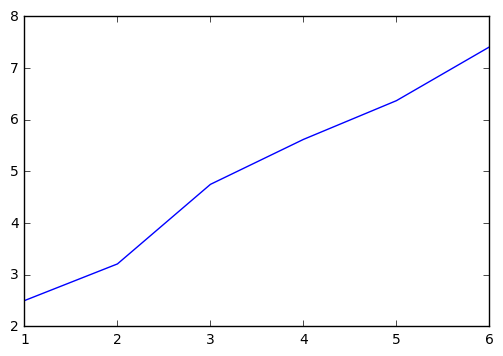

In [208]:
import numpy as np
import matplotlib.pyplot as plt
X=[1,2,3,4,5,6]
Y=[2.5 ,3.21,4.75,5.62,6.37,7.41]
z1 = np.polyfit(X, Y, 1) # linear fit
p1 = np.poly1d(z1)
plt.plot(X,Y)
plt.show()


## Demo for the errorevery keyword to show data full accuracy data plots with few errorbars.


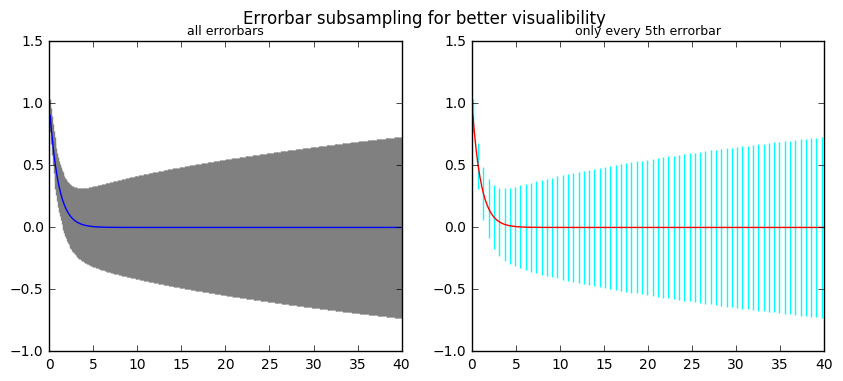

In [241]:
'''
Demo for the errorevery keyword to show data full accuracy data plots with
few errorbars.
'''

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 40, 0.1)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.1*np.sqrt(x)


# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(10,4))
ax = axs[0]
ax.errorbar(x, y, yerr=yerr,ecolor='grey',capthick=0)
ax.set_title('all errorbars',fontsize=9)

ax = axs[1]
ax.errorbar(x, y, yerr=yerr,color='red', ecolor='cyan',errorevery=6,capthick=0)
ax.set_title('only every 5th errorbar',fontsize=9)


fig.suptitle('Errorbar subsampling for better visualibility',fontsize=12)

plt.show()

# Combine each single spreading file into a dict-json file (SI/SIS)

In [308]:
import numpy as np
import json
import time
import sys
#----------start to count time-------------------
beginTime =time.clock()

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.8  # [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1

averageSpreadingContent = []
averageFinal = {}
content_stdDict = {}

if __name__ == "__main__":
    for keepN in range(1,11):
        temp = datapath + \
            "%s\\spreadingResult\\SIS\\beta_%s_gama_%s_keep%s_Average_test100.json" \
                % (dataset, beta, gama, keepN)
        
        content = json.load(open(temp)) # content type is a list
        content_std = np.array(content)/float(10146)  # standardlize the infected ratio
        content_stdDict = dict(zip(range(1,337),list(content_std))) 
        averageSpreadingContent.append(content_stdDict)
        
    averageFinal = dict(zip(range(1,11),averageSpreadingContent))
    
    outpath =datapath + \
            "%s\\spreadingResult\\SIS\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
                % (dataset, beta, gama)
                
    with open(outpath,'w') as averageFinalFile:
        averageFinalFile.write(json.dumps(averageFinal))
    
    #------------counting running time-----------------       
    endTime = time.clock()
    print('Running time: %s Seconds'%(endTime-beginTime))  

Running time: 0.0170963771816 Seconds


# draw spreading result with each keepN (SI/SIS)

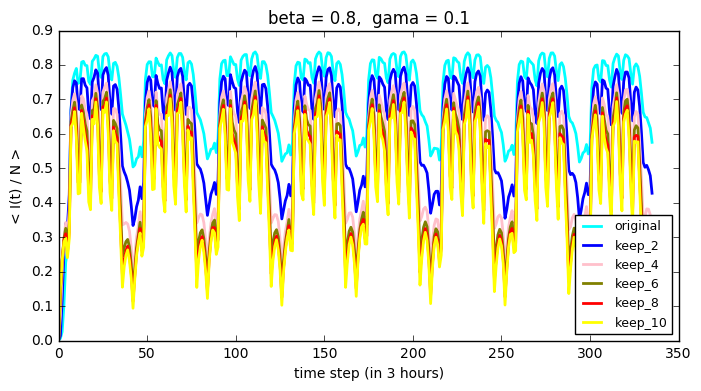

In [309]:
# draw spreading result with each keepN
import numpy as np
import matplotlib.pyplot as plt
import json

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.8   #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1, 0.2, 0.4,0.6,0.8,1.0]
gama = 0.1

averageFinalFile = json.load(open(datapath + \
         "%s\\spreadingResult\\SIS\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
         % (dataset, beta, gama)))

# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#             'size': 10 }

# keepN = range(1,11)
keepN = ['1','2','3','4','5','6','7','8','9','10']
selectOne = ['1']
keepN_select = ['1','2','4','6','8','10']
keepN_select1 = ['1','4','8','10']
keepN_Sample = [i for i in keepN if (int(i)-1)%2==0]
lineName = {'1':'original','2':'keep_2','3':'keep_3','4':'keep_4','5':'keep_5', \
            '6':'keep_6','7':'keep_7','8':'keep_8','9':'keep_9','10':'keep_10'}
# markers = ["-^","-<","->","-v"]
colors = ["cyan","blue","pink","olive","red","yellow","fuchsia","skyblue","mediumseagreen","sandybrown"]
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ci = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki][str(xi+1)] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ci], markersize = 7)
    ci += 1
    
# #     plt.plot(x, y, 'k')
# #     plt.title('Spreading With KeepN', fontdict=font)
# #     plt.text( 200,10300,r'keepN=%s'%(keepN), fontdict=font)
# #     plt.xlabel('time step', fontdict=font)
# #     plt.ylabel('< I(t) >', fontdict=font)
# #     plt.legend(y, colors, loc='upper right', shadow=True)
# #     plt.show()

ax.legend(loc="lower right", fontsize=9)
ax.set_xlabel("time step (in 3 hours)")
ax.set_ylabel("< I(t) / N >")
ax.set_title("beta = %s,  gama = %s"%(beta,gama))

# save fig
figpath = datapath + "%s\\spreadingResult\\fig\\beta_%s_gama_%s_SpreadingResult.png" % (dataset, beta, gama)
plt.savefig(figpath)

# show fig
plt.show()  

# Combine each single spreading file into a dict-json file (SIR)

In [282]:
import numpy as np
import json
import time
import sys
#----------start to count time-------------------
beginTime =time.clock()

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 1.0  # [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1

averageSpreadingContent = []
averageFinal = {}
content_stdDict = {}

if __name__ == "__main__":
    for keepN in range(1,11):
        temp = datapath + \
            "%s\\spreadingResult\\SIR\\beta_%s_gama_%s_keep%s_Average_test100.json" \
                % (dataset, beta, gama, keepN)
        
        content = json.load(open(temp)) # content type is a dict
        
        suscepitible_std = np.array(content["S"])/float(10146)  # standardlize the suscepitible ratio        
        infected_std = np.array(content["I"])/float(10146)      # standardlize the infected ratio
        removed_std = np.array(content["R"])/float(10146)       # standardlize the removed ratio
        
        state = ["S", "I", "R"]
        scale = [list(suscepitible_std), list(infected_std), list(removed_std)]
        content_stdDict = dict(zip(state, scale))
        
#         content_stdDict = dict(zip(range(1,337),list(infected_std))) 
        
        averageSpreadingContent.append(content_stdDict)
        
    averageFinal = dict(zip(range(1,11),averageSpreadingContent))
    
    outpath =datapath + \
            "%s\\spreadingResult\\SIR\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
                % (dataset, beta, gama)
                
    with open(outpath,'w') as averageFinalFile:
        averageFinalFile.write(json.dumps(averageFinal))
    
    #------------counting running time-----------------       
    endTime = time.clock()
    print('Running time: %s Seconds'%(endTime-beginTime))  


Running time: 0.449151956738 Seconds


# draw spreading result with each keepN (SIR)

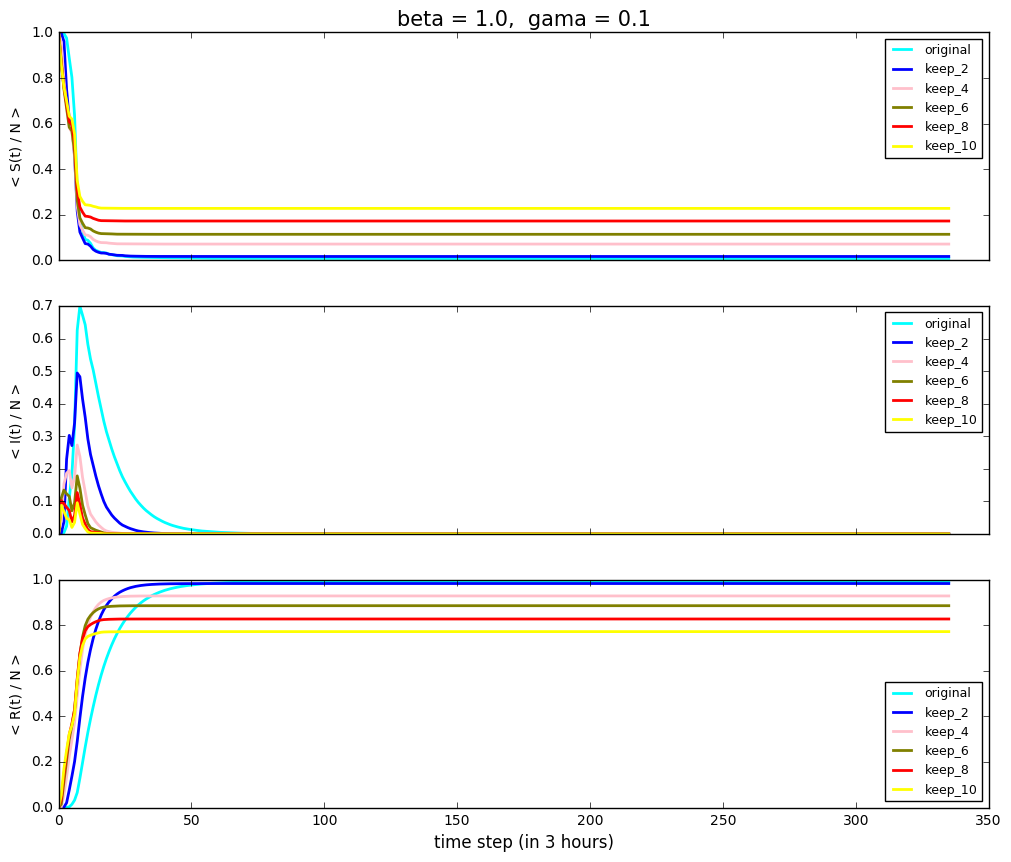

In [283]:
# draw spreading result with each keepN
import numpy as np
import matplotlib.pyplot as plt
import json

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 1.0   #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09, 0.1, 0.2, 0.4,0.6,0.8,1.0]
gama = 0.1

averageFinalFile = json.load(open(datapath + \
         "%s\\spreadingResult\\SIR\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
         % (dataset, beta, gama)))

# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#             'size': 10 }

# keepN = range(1,11)
keepN = ['1','2','3','4','5','6','7','8','9','10']
keepN_select = ['1','2','4','6','8','10']
keepN_select1 = ['1','4','8','10']
keepN_Sample = [i for i in keepN if (int(i)-1)%2==0]
lineName = {'1':'original','2':'keep_2','3':'keep_3','4':'keep_4','5':'keep_5', \
            '6':'keep_6','7':'keep_7','8':'keep_8','9':'keep_9','10':'keep_10'}
# markers = ["-^","-<","->","-v"]
colors = ["cyan","blue","pink","olive","red","yellow","fuchsia","skyblue","mediumseagreen","sandybrown"]

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,10))

ax = axs[0]
ai = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["S"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ai], markersize = 7)
    ax.legend(loc="best", fontsize=9)
    ax.set_ylabel("< S(t) / N >")
    ax.set_title("beta = %s,  gama = %s"%(beta,gama), fontsize=15)
    ai += 1

ax = axs[1]
bi = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["I"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[bi], markersize = 7)
    ax.legend(loc="best", fontsize=9)
    ax.set_ylabel("< I(t) / N >")
    bi += 1    
    
ax = axs[2]
ci = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["R"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ci], markersize = 7)
    ax.legend(loc="best", fontsize=9)
    ax.set_ylabel("< R(t) / N >")
    ax.set_xlabel("time step (in 3 hours)", fontsize=12)
    ci += 1    

# #     plt.plot(x, y, 'k')
# #     plt.title('Spreading With KeepN', fontdict=font)
# #     plt.text( 200,10300,r'keepN=%s'%(keepN), fontdict=font)
# #     plt.xlabel('time step', fontdict=font)
# #     plt.ylabel('< I(t) >', fontdict=font)
# #     plt.legend(y, colors, loc='upper right', shadow=True)
# #     plt.show()

# save fig
# figpath = datapath + "%s\\spreadingResult\\fig\\beta_%s_gama_%s_SpreadingResult.png" % (dataset, beta, gama)
# plt.savefig(figpath)

# show fig
plt.show()  

# Calculate the newly infected number in each time step (SI/SIS)

In [313]:
import numpy as np
import json
import time
import sys
#----------start to count time-------------------
beginTime =time.clock()

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.8  # [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1
#beta = float(sys.argv[1])

newInfectedContent = []
newInfectedFinal = {}
newInfectedDict = {}
keepN = 10

if __name__ == "__main__":
    averageFinal = datapath + \
            "%s\\spreadingResult\\SIS\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
                % (dataset, beta, gama)
    averageFinalContent = json.load(open(averageFinal)) # content type is a dict,totally from keep1 to keep10
    for ki in range(1,keepN+1):
        basic = []
        for ti in range(1,337):
            basic.append(averageFinalContent[str(ki)][str(ti)])
            last = [0]+basic[:-1]
            newInfectedRatio = np.array(basic)-np.array(last)
        newInfectedDict = dict(zip(range(1,337),list(newInfectedRatio)))
        newInfectedContent.append(newInfectedDict)
       
    newInfectedFinal = dict(zip(range(1,11),newInfectedContent))

    outpath =datapath + \
        "%s\\spreadingResult\\SIS\\AverageFinal\\beta_%s_gama_%s_NewInfected.json" \
            % (dataset, beta, gama)  
            
    with open(outpath,'w') as newInfectedFile:
        newInfectedFile.write(json.dumps(newInfectedFinal))      
        
    
    #------------counting running time-----------------       
    endTime = time.clock()
    print('Running time: %s Seconds'%(endTime-beginTime))        

Running time: 0.0620471183211 Seconds


# draw new infected number with each keepN (SI/SIS)

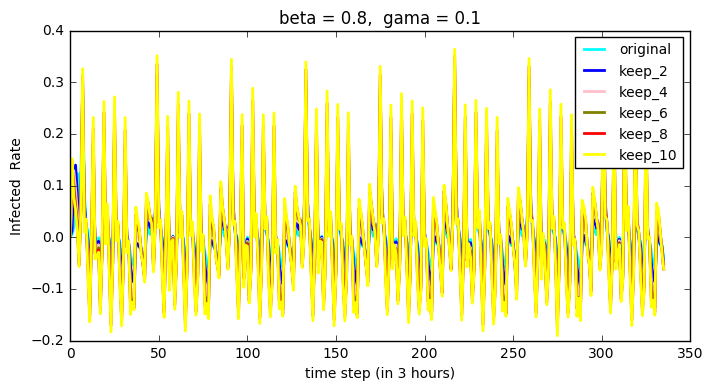

In [314]:
# draw new infected number with each keepN
import numpy as np
import matplotlib.pyplot as plt
import json

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.8   #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1

averageFinalFile = json.load(open(datapath + \
         "%s\\spreadingResult\\SIS\\AverageFinal\\beta_%s_gama_%s_NewInfected.json" \
         % (dataset, beta, gama)))

# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#             'size': 10 }

# keepN = range(1,11)
keepN = ['1','2','3','4','5','6','7','8','9','10']
selectOne = ['1','4','8']
keepN_select = ['1','2','4','6','8','10']
keepN_select1 = ['1','4','8','10']
keepN_Sample = [i for i in keepN if (int(i)-1)%2==0]
lineName = {'1':'original','2':'keep_2','3':'keep_3','4':'keep_4','5':'keep_5', \
            '6':'keep_6','7':'keep_7','8':'keep_8','9':'keep_9','10':'keep_10'}
# markers = ["-^","-<","->","-v"]
colors = ["cyan","blue","pink","olive","red","yellow","fuchsia","skyblue","mediumseagreen","sandybrown"]
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ci = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki][str(xi+1)] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ci], markersize = 7)
    ci += 1
    
# #     plt.plot(x, y, 'k')
# #     plt.title('Spreading With KeepN', fontdict=font)
# #     plt.text( 200,10300,r'keepN=%s'%(keepN), fontdict=font)
# #     plt.xlabel('time step', fontdict=font)
# #     plt.ylabel('< I(t) >', fontdict=font)
# #     plt.legend(y, colors, loc='upper right', shadow=True)
# #     plt.show()

ax.legend(loc= "best", fontsize=10)
ax.set_xlabel("time step (in 3 hours)")
ax.set_ylabel("Infected  Rate")
ax.set_title("beta = %s,  gama = %s"%(beta,gama))
# ax.set_ylim([-0.2,0.5])
# plt.show()    

# save fig
figpath = datapath + "%s\\spreadingResult\\fig\\beta_%s_gama_%s_NewInfected.png" % (dataset, beta, gama)
plt.savefig(figpath)

# show fig
plt.show()  

# Calculate the newly infected number in each time step (SIR)

In [303]:
import numpy as np
import json
import time
import sys
#----------start to count time-------------------
beginTime =time.clock()

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.4  # [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1
#beta = float(sys.argv[1])

newAddedContent = []
newAddedFinal = {}
# newAddedDict = {}
keepN = 10

if __name__ == "__main__":
    averageFinal = datapath + \
            "%s\\spreadingResult\\SIR\\AverageFinal\\beta_%s_gama_%s_AverageFinal.json" \
                % (dataset, beta, gama)
    averageFinalContent = json.load(open(averageFinal)) # content type is a dict,totally from keep1 to keep10
    for ki in range(1,keepN+1):
        basicS = []
        basicI = []
        basicR = []
        for ti in range(336):
            basicS.append(averageFinalContent[str(ki)]["S"][ti])
            lastS = [0]+basicS[:-1]
            newSuscepitibleRatio = np.array(basicS)-np.array(lastS)   # ndarray type
            
            basicI.append(averageFinalContent[str(ki)]["I"][ti])
            lastI = [0]+basicS[:-1]
            newInfectedRatio = np.array(basicI)-np.array(lastI)   # ndarray type         
            
            basicR.append(averageFinalContent[str(ki)]["R"][ti])
            lastR = [0]+basicR[:-1]
            newRemovedRatio = np.array(basicR)-np.array(lastR)   # ndarray type    
            
            state = ["S", "I", "R"]
            newRatio = [list(newSuscepitibleRatio), list(newInfectedRatio), list(newRemovedRatio)]
            newRatioDict = dict(zip(state, newRatio))
            
#         newInfectedDict = dict(zip(range(1,337),list(newInfectedRatio)))
        newAddedContent.append(newRatioDict)
       
    newAddedFinal = dict(zip(range(1,11),newAddedContent))

    outpath =datapath + \
        "%s\\spreadingResult\\SIR\\AverageFinal\\beta_%s_gama_%s_NewInfected.json" \
            % (dataset, beta, gama)  
            
    with open(outpath,'w') as newAddedFile:
        newAddedFile.write(json.dumps(newAddedFinal))      
        
    
    #------------counting running time-----------------       
    endTime = time.clock()
    print('Running time: %s Seconds'%(endTime-beginTime))   

Running time: 0.367912090034 Seconds


# draw new infected number with each keepN (SIR)

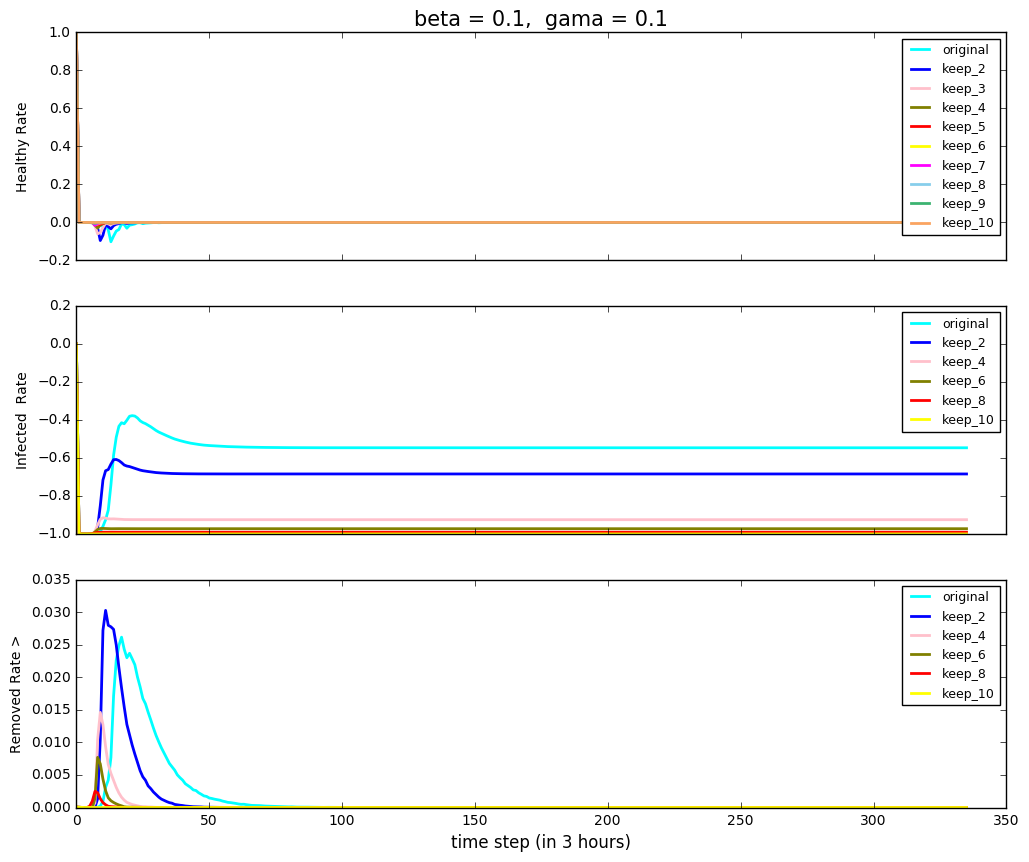

In [302]:
# draw new infected number with each keepN
import numpy as np
import matplotlib.pyplot as plt
import json

datapath = "F:\\master\\mywork\\18familiarStrangers\\data\\"
dataset = "fdu2013"
beta = 0.4   #[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.4,0.6,0.8,1.0]
gama = 0.1

averageFinalFile = json.load(open(datapath + \
         "%s\\spreadingResult\\SIR\\AverageFinal\\beta_%s_gama_%s_NewInfected.json" \
         % (dataset, beta, gama)))

# font = {'family': 'serif',
#         'color':  'darkred',
#         'weight': 'normal',
#             'size': 10 }

# keepN = range(1,11)
keepN = ['1','2','3','4','5','6','7','8','9','10']
selectOne = ['1','4','8']
keepN_select = ['1','2','4','6','8','10']
keepN_select1 = ['1','4','8','10']
keepN_Sample = [i for i in keepN if (int(i)-1)%2==0]
lineName = {'1':'original','2':'keep_2','3':'keep_3','4':'keep_4','5':'keep_5', \
            '6':'keep_6','7':'keep_7','8':'keep_8','9':'keep_9','10':'keep_10'}
# markers = ["-^","-<","->","-v"]
colors = ["cyan","blue","pink","olive","red","yellow","fuchsia","skyblue","mediumseagreen","sandybrown"]
    
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,10))

ax = axs[0]
ai = 0
for ki in keepN:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["S"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ai], markersize = 7)
    ax.legend(loc="best", fontsize=9)
    ax.set_ylabel("Healthy Rate")
    ax.set_title("beta = %s,  gama = %s"%(beta,gama), fontsize=15)
    ai += 1

ax = axs[1]
bi = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["I"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[bi], markersize = 7)
    ax.legend(loc="upper right", fontsize=9)
    ax.set_ylabel("Infected  Rate")
    bi += 1    
    
ax = axs[2]
ci = 0
for ki in keepN_select:
    x = range(336)
    ki = str(ki)
    y = [averageFinalFile[ki]["R"][xi] for xi in x] 
    ax.plot(x,y,label=lineName[ki], linewidth=2, color = colors[ci], markersize = 7)
    ax.legend(loc="best", fontsize=9)
    ax.set_ylabel("Removed Rate >")
    ax.set_xlabel("time step (in 3 hours)", fontsize=12)
    ci += 1   
    
# #     plt.plot(x, y, 'k')
# #     plt.title('Spreading With KeepN', fontdict=font)
# #     plt.text( 200,10300,r'keepN=%s'%(keepN), fontdict=font)
# #     plt.xlabel('time step', fontdict=font)
# #     plt.ylabel('< I(t) >', fontdict=font)
# #     plt.legend(y, colors, loc='upper right', shadow=True)
# #     plt.show() 

# save fig
figpath = datapath + "%s\\spreadingResult\\fig\\beta_%s_gama_%s_NewInfected.png" % (dataset, beta, gama)
plt.savefig(figpath)

# show fig
plt.show() 

# draw hitting time each ( NEW VERSION with the N-fold timesteps)¶

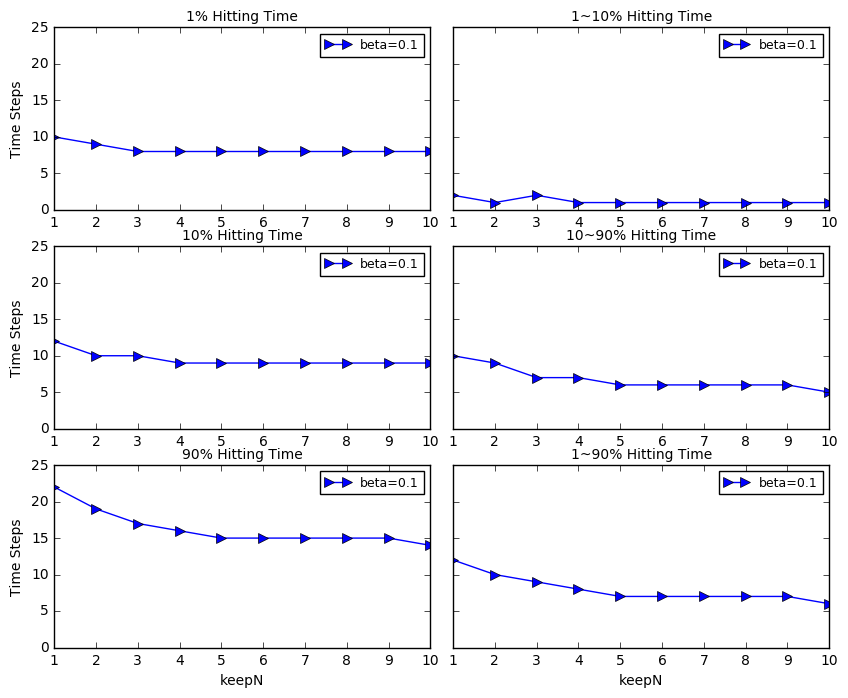

In [315]:
# draw ALL types of hitting time
# USE SI Model
import numpy as np
import matplotlib.pyplot as plt
import json

beta = ["0.1"]
hittingLabel = ["1% Hitting Time", 
                "1~10% Hitting Time",
                "10% Hitting Time", 
                "10~90% Hitting Time",
                "90% Hitting Time",
                "1~90% Hitting Time"]

# statistic spreading data
hittingDict = {
                "1% Hitting Time" :{"0.1":[10,9,8,8,8,8,8,8,8,8]
#                                     "0.2":[5,7,8,9,9,10,11,12,13,14], 
#                                     "0.4":[6,7,9,11,13,15,17,19,21,23], 
#                                     "0.01":[24,26,29,33,37,40,35,36,36,39], 
#                                     "0.02":[16,18,22,20,20,22,24,25,28,29],
#                                     "0.03":[13,16,18,17,18,20,22,23,24,25],
#                                     "0.04":[13,16,17,19,20,22,24,27,29,31],
#                                     "0.05":[10,10,11,12,13,14,15,16,17,18],
#                                     "0.06":[9,9,10,11,11,12,13,14,14,15],
#                                     "0.07":[11,16,23,29,33,38,43,47,53,57],
#                                     "0.08":[7,7,7,8,9,10,11,11,12,13],
#                                     "0.09":[10,14,15,16,19,20,21,20,21,22]
                                   },
                "10% Hitting Time":{"0.1":[12,10,10,9,9,9,9,9,9,9] 
#                                     "0.2":[8,9,10,12,13,14,15,17,19,20], 
#                                     "0.4":[8,9,11,13,16,18,20,22,24,26], 
#                                     "0.01":[39,38,41,42,46,49,53,58,64,67], 
#                                     "0.02":[23,25,28,31,36,39,39,37,39,41],
#                                     "0.03":[17,21,25,29,34,33,34,34,37,37],
#                                     "0.04":[17,19,23,29,31,31,32,34,37,39],
#                                     "0.05":[14,15,16,17,18,20,22,23,25,26],
#                                     "0.06":[11,15,14,15,16,19,20,21,22,23],
#                                     "0.07":[14,19,25,31,37,43,50,55,59,63],
#                                     "0.08":[9,11,12,13,15,17,18,19,21,22],
#                                     "0.09":[14,17,22,25,26,26,29,30,32,31]
                                   },
                "90% Hitting Time":{"0.1":[22,19,17,16,15,15,15,15,15,14]  
#                                     "0.2":[15,22,31,40,46,55,64,73,82,91], 
#                                     "0.4":[14,21,31,37,46,55,64,73,82,92], 
#                                     "0.01":[104,107,98,104,111,121,134,131,140,150], 
#                                     "0.02":[62,55,64,71,77,86,96,106,118,126],
#                                     "0.03":[46,45,58,62,72,82,93,105,114,121],
#                                     "0.04":[38,42,47,57,66,78,85,90,95,102],
#                                     "0.05":[28,33,42,53,58,63,71,81,91,101],
#                                     "0.06":[26,31,40,49,53,61,71,81,91,101],
#                                     "0.07":[26,36,44,54,66,78,85,97,109,113],
#                                     "0.08":[21,28,37,42,51,61,71,80,85,93],
#                                     "0.09":[24,35,44,55,66,79,85,97,100,101]
                                   },
              "1~10% Hitting Time":{"0.1":[2,1,2,1,1,1,1,1,1,1]
#                                     "0.2":[3,2,2,3,4,4,4,5,6,6],
#                                     "0.4":[2,2,2,2,3,3,3,3,3,3],
#                                     "0.01":[15,12,12,9,9,9,18,22,28,28],
#                                     "0.02":[7,7,6,11,16,17,15,12,11,12],
#                                     "0.03":[4,5,7,12,16,13,12,11,13,12],
#                                     "0.04":[4,3,6,10,11,9,8,7,8,8],
#                                     "0.05":[4,5,5,5,5,6,7,7,8,8],
#                                     "0.06":[2,6,4,4,5,7,7,7,8,8],
#                                     "0.07":[3,3,2,2,4,5,7,8,6,6],
#                                     "0.08":[2,4,5,5,6,7,7,8,9,9],
#                                     "0.09":[4,3,7,9,7,6,8,10,11,9]
                                   },
             "10~90% Hitting Time":{"0.1":[10,9,7,7,6,6,6,6,6,5]
#                                     "0.2":[7,13,21,28,33,41,49,56,63,71],
#                                     "0.4":[6,12,20,24,30,37,44,51,58,66],
#                                     "0.01":[65,69,57,62,65,72,81,73,76,83],
#                                     "0.02":[39,30,36,40,41,47,57,69,79,85],
#                                     "0.03":[29,24,33,33,38,49,59,71,77,84],
#                                     "0.04":[21,23,24,28,35,47,53,56,58,63],
#                                     "0.05":[14,18,26,36,40,43,49,58,66,75],
#                                     "0.06":[15,16,26,34,37,42,51,60,69,78],
#                                     "0.07":[12,17,19,23,29,35,35,42,50,50],
#                                     "0.08":[12,17,25,29,36,44,53,61,64,71],
#                                     "0.09":[10,18,22,30,40,53,56,67,68,70]
                                    },
               "1~90% Hitting Time":{"0.1":[12,10,9,8,7,7,7,7,7,6]
#                                      "0.2":[10,15,23,31,37,45,53,61,69,77],
#                                      "0.4":[8,14,22,26,33,40,47,54,61,69],
#                                      "0.01":[80,81,69,71,74,81,99,95,104,111],
#                                      "0.02":[46,37,42,51,57,64,72,81,90,97],
#                                      "0.03":[33,29,40,45,54,62,71,82,90,96],
#                                      "0.04":[25,26,30,38,46,56,61,63,66,71],
#                                      "0.05":[18,23,31,41,45,49,56,65,74,83],
#                                      "0.06":[17,22,30,38,42,49,58,67,77,86],
#                                      "0.07":[15,20,21,25,33,40,42,50,56,56],
#                                      "0.08":[14,21,30,34,42,51,60,69,73,80],
#                                      "0.09":[14,21,29,39,47,59,64,77,79,79]
                                    }
               }

# colors = ["cyan","pink","blue","olive","yellow","mediumseagreen","sandybrown","gold","navy","fuchsia"]
markers = ["-o","->","-x","-*","-^","-p","-s","-v","-D","-h","-8","-<"]
lineName = {"0.1":"beta=0.1"}

# lineName = {"0.01":"beta=0.01", "0.02":"beta=0.02","0.03":"beta=0.03",
#             "0.04":"beta=0.04","0.05":"beta=0.05","0.06":"beta=0.06",
#             "0.07":"beta=0.07","0.08":"beta=0.08","0.09":"beta=0.09",
#             "0.1":"beta=0.1", "0.2":"beta=0.2", "0.4":"beta=0.4"}

fig, ax = plt.subplots(3, 2, sharey=True, figsize=(10,8))

ci = 0
for i in range(3):
    for j in range(2):
        li = 0
        for ki in beta:
            ci += 1 
            x = range(1,11)
            hi =hittingLabel[ci-1]
            y = hittingDict[hi][ki]        
            li += 1 
            
        ax[i,j].plot(x,y,markers[li],label=lineName[ki], linewidth=1, markersize=7)
        ax[i,j].legend(loc="best", fontsize=9)

        ax[2,0].set_xlabel("keepN")
        ax[2,1].set_xlabel("keepN")
        ax[i,j].set_title("%s"%hittingLabel[ci-1],fontsize=10)
    ax[i,0].set_ylabel("Time Steps")
plt.subplots_adjust(wspace=0.06)

# save fig
figpath = datapath + "%s\\spreadingResult\\fig\\beta_%s_hittingTime.png" % (dataset, beta)
plt.savefig(figpath)

plt.show()       

# draw hitting time each (OLD VERSION with the same timesteps)

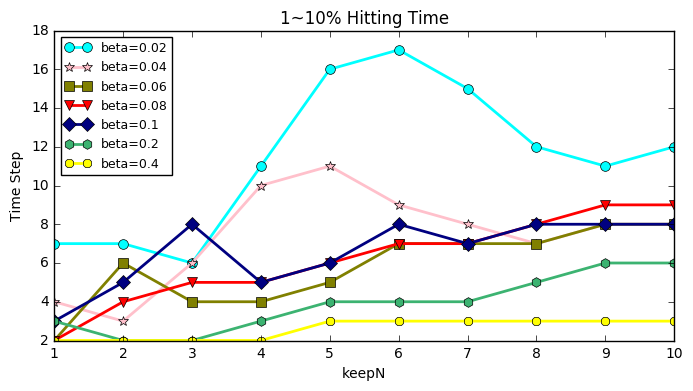

In [549]:
# draw one type of hitting time
# USE SI Model
import numpy as np
import matplotlib.pyplot as plt
import json


beta = ["0.02","0.04","0.06","0.08", "0.1", "0.2", "0.4"]
# statistic spreading data
hitting_1 = {"0.1":[8,10,11,13,14,14,16,17,18,19], 
             "0.2":[5,7,8,9,9,10,11,12,13,14], 
             "0.4":[6,7,9,11,13,15,17,19,21,23], 
             "0.01":[24,26,29,33,37,40,35,36,36,39], 
             "0.02":[16,18,22,20,20,22,24,25,28,29],
             "0.03":[13,16,18,17,18,20,22,23,24,25],
             "0.04":[13,16,17,19,20,22,24,27,29,31],
             "0.05":[10,10,11,12,13,14,15,16,17,18],
             "0.06":[9,9,10,11,11,12,13,14,14,15],
             "0.07":[11,16,23,29,33,38,43,47,53,57],
             "0.08":[7,7,7,8,9,10,11,11,12,13],
             "0.09":[10,14,15,16,19,20,21,20,21,22]
            }
hitting_10 = {"0.1":[11,15,19,18,20,22,23,25,26,27], 
              "0.2":[8,9,10,12,13,14,15,17,19,20], 
              "0.4":[8,9,11,13,16,18,20,22,24,26], 
              "0.01":[39,38,41,42,46,49,53,58,64,67], 
              "0.02":[23,25,28,31,36,39,39,37,39,41],
              "0.03":[17,21,25,29,34,33,34,34,37,37],
              "0.04":[17,19,23,29,31,31,32,34,37,39],
              "0.05":[14,15,16,17,18,20,22,23,25,26],
              "0.06":[11,15,14,15,16,19,20,21,22,23],
              "0.07":[14,19,25,31,37,43,50,55,59,63],
              "0.08":[9,11,12,13,15,17,18,19,21,22],
              "0.09":[14,17,22,25,26,26,29,30,32,31]
             }
hitting_90 = {"0.1":[21,29,39,43,51,61,71,81,85,92],  
              "0.2":[15,22,31,40,46,55,64,73,82,91], 
              "0.4":[14,21,31,37,46,55,64,73,82,92], 
              "0.01":[104,107,98,104,111,121,134,131,140,150], 
              "0.02":[62,55,64,71,77,86,96,106,118,126],
              "0.03":[46,45,58,62,72,82,93,105,114,121],
              "0.04":[38,42,47,57,66,78,85,90,95,102],
              "0.05":[28,33,42,53,58,63,71,81,91,101],
              "0.06":[26,31,40,49,53,61,71,81,91,101],
              "0.07":[26,36,44,54,66,78,85,97,109,113],
              "0.08":[21,28,37,42,51,61,71,80,85,93],
              "0.09":[24,35,44,55,66,79,85,97,100,101]
             }
hitting_1_10 = {"0.1":[3,5,8,5,6,8,7,8,8,8],
                "0.2":[3,2,2,3,4,4,4,5,6,6],
                "0.4":[2,2,2,2,3,3,3,3,3,3],
                "0.01":[15,12,12,9,9,9,18,22,28,28],
                "0.02":[7,7,6,11,16,17,15,12,11,12],
                "0.03":[4,5,7,12,16,13,12,11,13,12],
                "0.04":[4,3,6,10,11,9,8,7,8,8],
                "0.05":[4,5,5,5,5,6,7,7,8,8],
                "0.06":[2,6,4,4,5,7,7,7,8,8],
                "0.07":[3,3,2,2,4,5,7,8,6,6],
                "0.08":[2,4,5,5,6,7,7,8,9,9],
                "0.09":[4,3,7,9,7,6,8,10,11,9]
                }
hitting_10_90 = {"0.1":[10,14,20,25,31,39,48,56,59,65],
                 "0.2":[7,13,21,28,33,41,49,56,63,71],
                 "0.4":[6,12,20,24,30,37,44,51,58,66],
                 "0.01":[65,69,57,62,65,72,81,73,76,83],
                 "0.02":[39,30,36,40,41,47,57,69,79,85],
                 "0.03":[29,24,33,33,38,49,59,71,77,84],
                 "0.04":[21,23,24,28,35,47,53,56,58,63],
                 "0.05":[14,18,26,36,40,43,49,58,66,75],
                 "0.06":[15,16,26,34,37,42,51,60,69,78],
                 "0.07":[12,17,19,23,29,35,35,42,50,50],
                 "0.08":[12,17,25,29,36,44,53,61,64,71],
                 "0.09":[10,18,22,30,40,53,56,67,68,70]
                }
hitting_1_90 = {"0.1":[13,19,28,30,37,47,55,64,67,73],
                 "0.2":[10,15,23,31,37,45,53,61,69,77],
                 "0.4":[8,14,22,26,33,40,47,54,61,69],
                 "0.01":[80,81,69,71,74,81,99,95,104,111],
                 "0.02":[46,37,42,51,57,64,72,81,90,97],
                 "0.03":[33,29,40,45,54,62,71,82,90,96],
                 "0.04":[25,26,30,38,46,56,61,63,66,71],
                 "0.05":[18,23,31,41,45,49,56,65,74,83],
                 "0.06":[17,22,30,38,42,49,58,67,77,86],
                 "0.07":[15,20,21,25,33,40,42,50,56,56],
                 "0.08":[14,21,30,34,42,51,60,69,73,80],
                 "0.09":[14,21,29,39,47,59,64,77,79,79]
                }

colors = ["cyan","pink","olive","red","navy","mediumseagreen","yellow","sandybrown"]
markers = ["-o","-*","-s","-v","-D","-h","-8","p"]
lineName = {"0.01":"beta=0.01", "0.02":"beta=0.02","0.03":"beta=0.03","0.04":"beta=0.04","0.06":"beta=0.06",
            "0.08":"beta=0.08","0.1":"beta=0.1", "0.2":"beta=0.2", "0.4":"beta=0.4"}
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ci = 0
for ki in beta:
    x = range(1,11)
    y = hitting_1_10[ki] 
    ax.plot(x,y,markers[ci],label=lineName[ki], linewidth=2, color = colors[ci], markersize=7)
    ci += 1  
    
ax.legend(loc="best", fontsize=9)
ax.set_xlabel("keepN")
ax.set_ylabel("Time Step")
ax.set_title("1~10% Hitting Time")

# save fig
figpath = "C:\\Users\\CAN_LC\\Pictures\\SpreadingPic\\beta_all\\hitting_1_10.png"%(beta)
plt.savefig(figpath)

# show fig
plt.show()   

# draw hitting time multi-graph (OLD VERSION with the same timesteps)

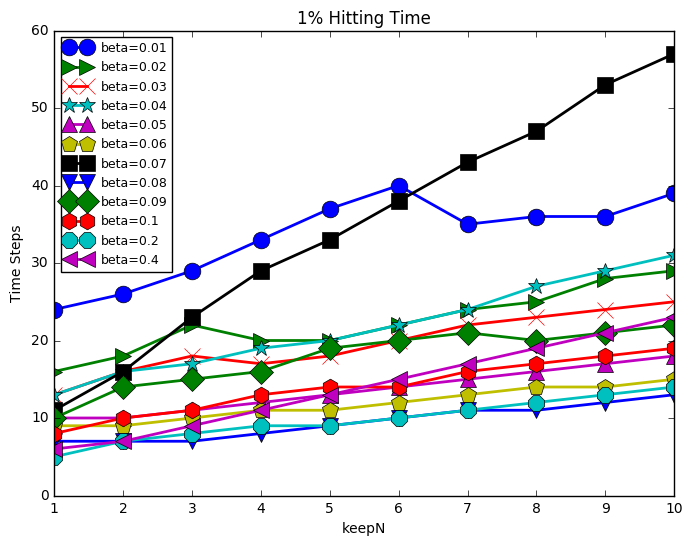

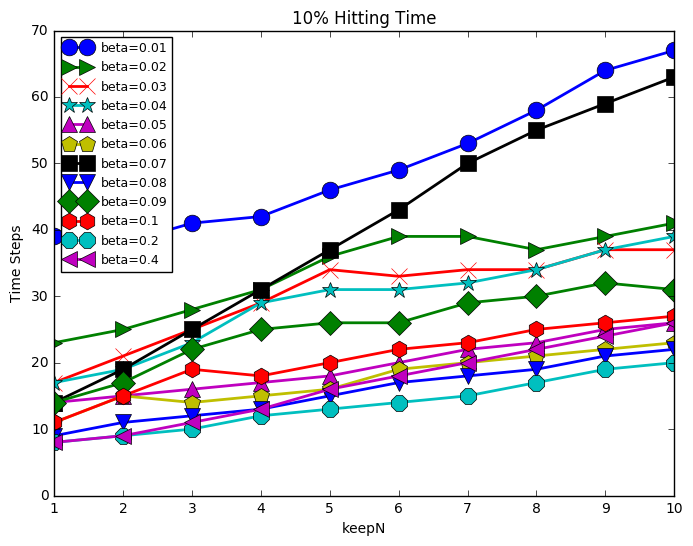

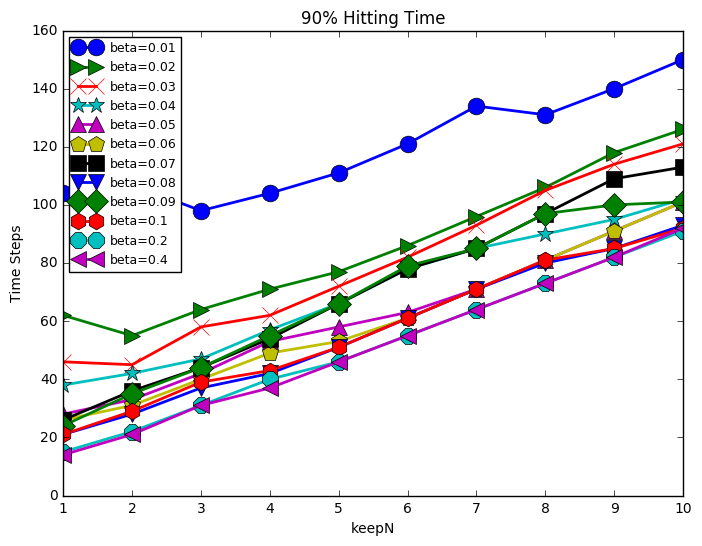

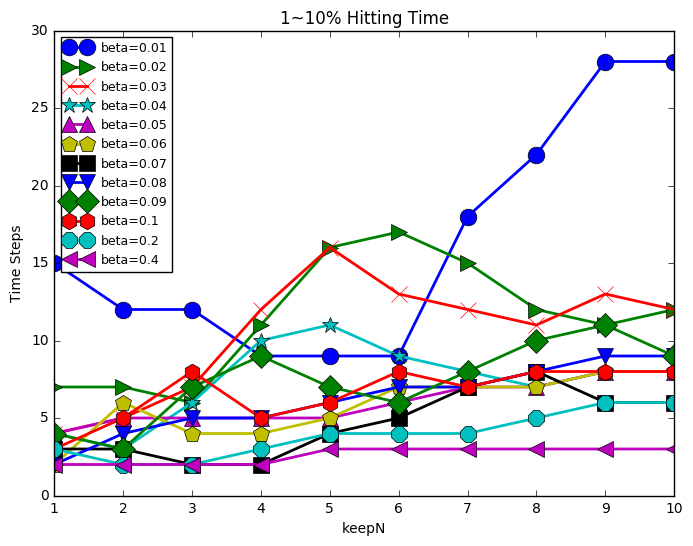

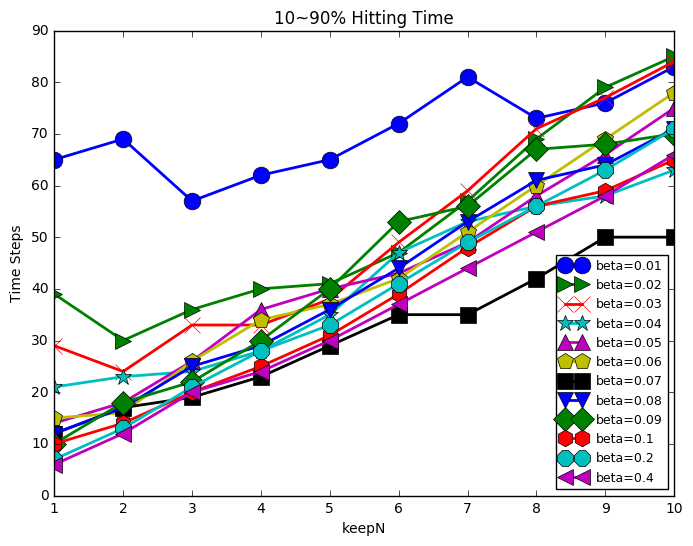

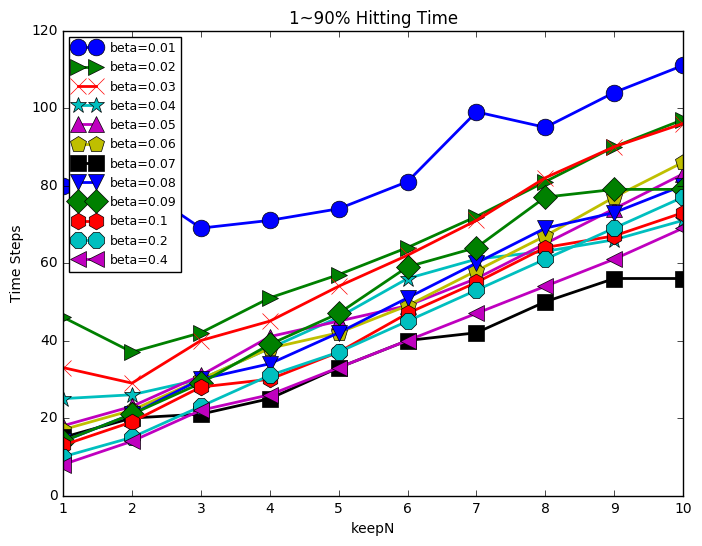

In [124]:
# draw ALL types of hitting time
# USE SI Model
import numpy as np
import matplotlib.pyplot as plt
import json

beta = ["0.01","0.02","0.03","0.04","0.05","0.06","0.07","0.08","0.09","0.1","0.2","0.4"]
hittingLabel = ["1% Hitting Time", 
                "10% Hitting Time", 
                "90% Hitting Time",
                "1~10% Hitting Time",
                "10~90% Hitting Time",
                "1~90% Hitting Time"]

# statistic spreading data
hittingDict = {
                "1% Hitting Time" :{"0.1":[8,10,11,13,14,14,16,17,18,19], 
                                    "0.2":[5,7,8,9,9,10,11,12,13,14], 
                                    "0.4":[6,7,9,11,13,15,17,19,21,23], 
                                    "0.01":[24,26,29,33,37,40,35,36,36,39], 
                                    "0.02":[16,18,22,20,20,22,24,25,28,29],
                                    "0.03":[13,16,18,17,18,20,22,23,24,25],
                                    "0.04":[13,16,17,19,20,22,24,27,29,31],
                                    "0.05":[10,10,11,12,13,14,15,16,17,18],
                                    "0.06":[9,9,10,11,11,12,13,14,14,15],
                                    "0.07":[11,16,23,29,33,38,43,47,53,57],
                                    "0.08":[7,7,7,8,9,10,11,11,12,13],
                                    "0.09":[10,14,15,16,19,20,21,20,21,22]
                                   },
                "10% Hitting Time":{"0.1":[11,15,19,18,20,22,23,25,26,27], 
                                    "0.2":[8,9,10,12,13,14,15,17,19,20], 
                                    "0.4":[8,9,11,13,16,18,20,22,24,26], 
                                    "0.01":[39,38,41,42,46,49,53,58,64,67], 
                                    "0.02":[23,25,28,31,36,39,39,37,39,41],
                                    "0.03":[17,21,25,29,34,33,34,34,37,37],
                                    "0.04":[17,19,23,29,31,31,32,34,37,39],
                                    "0.05":[14,15,16,17,18,20,22,23,25,26],
                                    "0.06":[11,15,14,15,16,19,20,21,22,23],
                                    "0.07":[14,19,25,31,37,43,50,55,59,63],
                                    "0.08":[9,11,12,13,15,17,18,19,21,22],
                                    "0.09":[14,17,22,25,26,26,29,30,32,31]
                                   },
                "90% Hitting Time":{"0.1":[21,29,39,43,51,61,71,81,85,92],  
                                    "0.2":[15,22,31,40,46,55,64,73,82,91], 
                                    "0.4":[14,21,31,37,46,55,64,73,82,92], 
                                    "0.01":[104,107,98,104,111,121,134,131,140,150], 
                                    "0.02":[62,55,64,71,77,86,96,106,118,126],
                                    "0.03":[46,45,58,62,72,82,93,105,114,121],
                                    "0.04":[38,42,47,57,66,78,85,90,95,102],
                                    "0.05":[28,33,42,53,58,63,71,81,91,101],
                                    "0.06":[26,31,40,49,53,61,71,81,91,101],
                                    "0.07":[26,36,44,54,66,78,85,97,109,113],
                                    "0.08":[21,28,37,42,51,61,71,80,85,93],
                                    "0.09":[24,35,44,55,66,79,85,97,100,101]
                                   },
              "1~10% Hitting Time":{"0.1":[3,5,8,5,6,8,7,8,8,8],
                                    "0.2":[3,2,2,3,4,4,4,5,6,6],
                                    "0.4":[2,2,2,2,3,3,3,3,3,3],
                                    "0.01":[15,12,12,9,9,9,18,22,28,28],
                                    "0.02":[7,7,6,11,16,17,15,12,11,12],
                                    "0.03":[4,5,7,12,16,13,12,11,13,12],
                                    "0.04":[4,3,6,10,11,9,8,7,8,8],
                                    "0.05":[4,5,5,5,5,6,7,7,8,8],
                                    "0.06":[2,6,4,4,5,7,7,7,8,8],
                                    "0.07":[3,3,2,2,4,5,7,8,6,6],
                                    "0.08":[2,4,5,5,6,7,7,8,9,9],
                                    "0.09":[4,3,7,9,7,6,8,10,11,9]
                                   },
             "10~90% Hitting Time":{"0.1":[10,14,20,25,31,39,48,56,59,65],
                                    "0.2":[7,13,21,28,33,41,49,56,63,71],
                                    "0.4":[6,12,20,24,30,37,44,51,58,66],
                                    "0.01":[65,69,57,62,65,72,81,73,76,83],
                                    "0.02":[39,30,36,40,41,47,57,69,79,85],
                                    "0.03":[29,24,33,33,38,49,59,71,77,84],
                                    "0.04":[21,23,24,28,35,47,53,56,58,63],
                                    "0.05":[14,18,26,36,40,43,49,58,66,75],
                                    "0.06":[15,16,26,34,37,42,51,60,69,78],
                                    "0.07":[12,17,19,23,29,35,35,42,50,50],
                                    "0.08":[12,17,25,29,36,44,53,61,64,71],
                                    "0.09":[10,18,22,30,40,53,56,67,68,70]
                                    },
               "1~90% Hitting Time":{"0.1":[13,19,28,30,37,47,55,64,67,73],
                                     "0.2":[10,15,23,31,37,45,53,61,69,77],
                                     "0.4":[8,14,22,26,33,40,47,54,61,69],
                                     "0.01":[80,81,69,71,74,81,99,95,104,111],
                                     "0.02":[46,37,42,51,57,64,72,81,90,97],
                                     "0.03":[33,29,40,45,54,62,71,82,90,96],
                                     "0.04":[25,26,30,38,46,56,61,63,66,71],
                                     "0.05":[18,23,31,41,45,49,56,65,74,83],
                                     "0.06":[17,22,30,38,42,49,58,67,77,86],
                                     "0.07":[15,20,21,25,33,40,42,50,56,56],
                                     "0.08":[14,21,30,34,42,51,60,69,73,80],
                                     "0.09":[14,21,29,39,47,59,64,77,79,79]
                                    }
               }

# colors = ["cyan","pink","blue","olive","yellow","mediumseagreen","sandybrown","gold","navy","fuchsia"]
markers = ["-o","->","-x","-*","-^","-p","-s","-v","-D","-h","-8","-<"]
lineName = {"0.01":"beta=0.01", "0.02":"beta=0.02","0.03":"beta=0.03",
            "0.04":"beta=0.04","0.05":"beta=0.05","0.06":"beta=0.06",
            "0.07":"beta=0.07","0.08":"beta=0.08","0.09":"beta=0.09",
            "0.1":"beta=0.1", "0.2":"beta=0.2", "0.4":"beta=0.4"}

for hi in hittingLabel:
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ci = 0
    for ki in beta:
        x = range(1,11)
        y = hittingDict[hi][ki] 
        ax.plot(x,y,markers[ci],label=lineName[ki], linewidth=2,  markersize=12)
        ci += 1  

    ax.legend(loc="best", fontsize=9)
    ax.set_xlabel("keepN")
    ax.set_ylabel("Time Steps")
    ax.set_title("%s"%hi)
    plt.show()   